# 1. Read file

In [1]:
import pandas as pd

ds = pd.read_csv('binaaz_train.csv')

# 2. Clean data

In [2]:
ds.rename(columns = {'Sahə':'area', 'Otaq sayı':'rooms'}, inplace = True)

ds['area'] = ds['area'].apply(lambda x: float(x.rstrip('m²м')))

print(ds['area'].values)

[135.  132.5 115.  ...  72.  109.   82. ]
[135.  132.5 115.  ...  72.  109.   82. ]


## a) Area

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbc780bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbc7850370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbc780bac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbc7850910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbc7850be0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbc780bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbc7850370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbc780bac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbc7850910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbc7850be0>],
 'means': []}

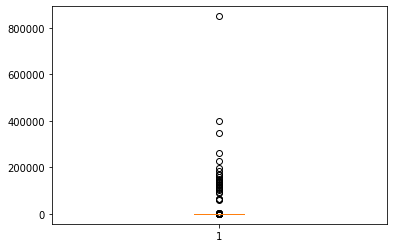

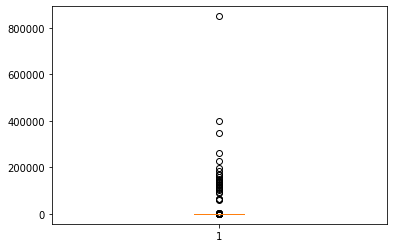

In [3]:
import matplotlib.pyplot as plt

plt.boxplot(ds['area'])

In [4]:
q1 = ds['area'].quantile(q = 0.25)
q3 = ds['area'].quantile(q = 0.75)
iqr = q3- q1

max_ = q3 + 5*iqr
min_ = q1 - 5*iqr
print(min_, max_)
min_ = 10
print(min_, max_)

-245.0 459.0
10 459.0
-245.0 459.0
10 459.0


In [5]:
import numpy as np
ds = ds[ds['area'].apply(lambda x: x > min_ and x < max_)]
print(ds['area'].dtypes)

float64
float64


In [6]:
ds['area'].describe()

count    69078.000000
mean       113.091921
std         51.115468
min         11.000000
25%         75.000000
50%        105.000000
75%        138.000000
max        453.000000
Name: area, dtype: float64

count    69078.000000
mean       113.091921
std         51.115468
min         11.000000
25%         75.000000
50%        105.000000
75%        138.000000
max        453.000000
Name: area, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbca1aee00>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbca1ac850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbca1aeb30>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbca1af820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbca1afaf0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbca1aee00>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbca1ac850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbca1aeb30>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbca1af820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbca1afaf0>],
 'means': []}

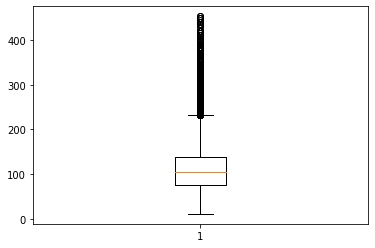

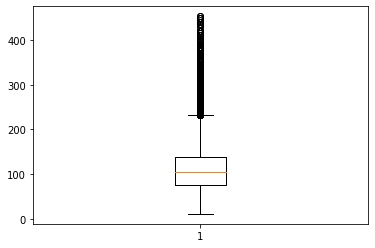

In [7]:
plt.boxplot(ds['area'])

## b) Number of rooms

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbca348ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbca349480>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbca348c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbca349a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbca349cf0>],
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1bbca348ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bbca349480>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bbca348c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1bbca349a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bbca349cf0>],
 'means': []}

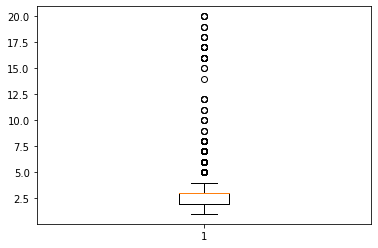

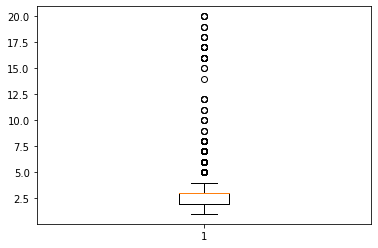

In [8]:
plt.boxplot(ds['rooms'])

In [9]:
ds['rooms'].values

array([3, 3, 2, ..., 2, 3, 2], dtype=int64)

array([3, 3, 2, ..., 2, 3, 2], dtype=int64)

## Target: Price

69078

69078

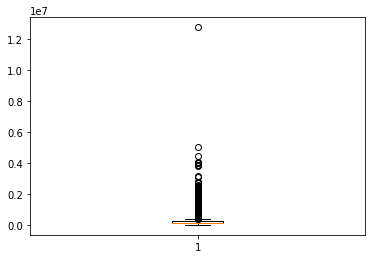

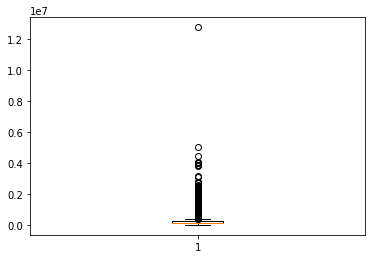

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(ds['price'])
ds['price'].size

In [11]:
q1 = ds['price'].quantile(q = 0.25)
q3 = ds['price'].quantile(q = 0.75)
iqr = q3- q1

max_ = q3 + 4*iqr
min_ = q1 - 4*iqr
print(min_, max_)
min_ = 0
print(min_, max_)

-387000.0 720000.0
0 720000.0
-387000.0 720000.0
0 720000.0


In [12]:
ds = ds[ds['price'].apply(lambda x: x > min_ and x < max_)]
print(ds['price'].dtype)
ds['price'] = ds['price'].dropna()

int64
int64


In [13]:
ds['_id'].count()

68088

68088

## d) Other

In [14]:
#kupca
#ipoteka
#poster_type

In [15]:
ds['Kupça'] = ds['Kupça'].apply(lambda s: 0 if s =='yoxdur' else 1)
ds['İpoteka'] = ds['İpoteka'].apply(lambda s: 0 if s =='yoxdur' else 1)
ds['poster_type'] = ds['poster_type'].apply(lambda s: 1 if s =='vasitəçi (agent)' else 0)

# f) Latitude, Longitude

In [16]:
ds[['latitude', 'longitude']].describe()

,latitude,longitude
count,68088.000000,68088.000000
mean,40.399235,49.842797
std,0.192667,0.750604
min,39.247907,-144.714092
25%,40.382758,49.808717
50%,40.393627,49.837656
75%,40.406314,49.871877
max,89.464469,50.331135


,latitude,longitude
count,68088.000000,68088.000000
mean,40.399235,49.842797
std,0.192667,0.750604
min,39.247907,-144.714092
25%,40.382758,49.808717
50%,40.393627,49.837656
75%,40.406314,49.871877
max,89.464469,50.331135


In [17]:
q1 = ds['latitude'].quantile(q = 0.25)
q3 = ds['latitude'].quantile(q = 0.75)
iqr = q3 - q1

max_ = q3 + 5*iqr
min_ = q1 - 5*iqr
print(min_, max_)
min_ = 1
print(min_, max_)
ds = ds[ds['latitude'].apply(lambda x: x > min_ and x < max_)]

40.264977270770345 40.5240944498664
1 40.5240944498664
40.264977270770345 40.5240944498664
1 40.5240944498664


In [18]:
q1 = ds['longitude'].quantile(q = 0.25)
q3 = ds['longitude'].quantile(q = 0.75)
iqr = q3 - q1

max_ = q3 + 5*iqr
min_ = q1 - 5*iqr
print(min_, max_)
min_ = 1
print(min_, max_)
ds = ds[ds['longitude'].apply(lambda x: x > min_ and x < max_)]

49.49432115534941 50.18658852593759
1 50.18658852593759
49.49432115534941 50.18658852593759
1 50.18658852593759


In [19]:
ds[['latitude', 'longitude']].describe()

,latitude,longitude
count,67614.000000,67614.000000
mean,40.397169,49.846821
std,0.025817,0.057501
min,39.247907,48.837083
25%,40.382670,49.808988
50%,40.393542,49.837929
75%,40.405538,49.871922
max,40.522015,50.184795


,latitude,longitude
count,67614.000000,67614.000000
mean,40.397169,49.846821
std,0.025817,0.057501
min,39.247907,48.837083
25%,40.382670,49.808988
50%,40.393542,49.837929
75%,40.405538,49.871922
max,40.522015,50.184795


In [20]:
x = ds[['latitude', 'longitude']]

In [21]:
from sklearn.cluster import KMeans

l = []

for n in range(1, 10):
    kmeans = KMeans(n_clusters = n, random_state = 42).fit(x)
    l.append(kmeans.inertia_)

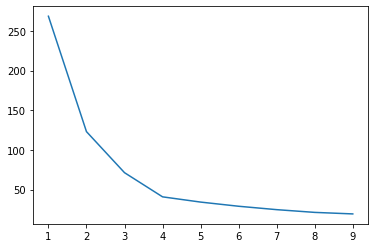

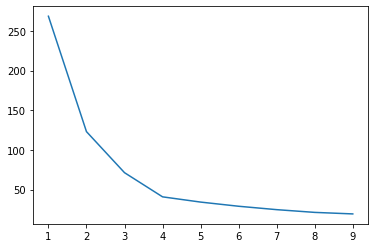

In [22]:
x_elbow = [i for i in range(1,10)]
y_elbow = l

plt.plot(x_elbow, y_elbow)

In [23]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
#.fit(x)
extra1 = kmeans.fit_transform(x)

In [24]:
ds.columns

Index(['_id', 'title', 'price', 'price_currency', 'poster', 'poster_type',
       'Ünvan', 'description', 'Yeniləndi', 'Mərtəbə', 'area', 'rooms',
       'Kupça', 'İpoteka', 'locations', 'latitude', 'longitude', 'seher'],
      dtype='object')

Index(['_id', 'title', 'price', 'price_currency', 'poster', 'poster_type',
       'Ünvan', 'description', 'Yeniləndi', 'Mərtəbə', 'area', 'rooms',
       'Kupça', 'İpoteka', 'locations', 'latitude', 'longitude', 'seher'],
      dtype='object')

## g) Extra features

In [25]:
x = ds[['area', 'rooms']]

In [26]:
from sklearn.cluster import KMeans

l = []

for n in range(1, 10):
    kmeans = KMeans(n_clusters = n, random_state = 42).fit(x)
    l.append(kmeans.inertia_)

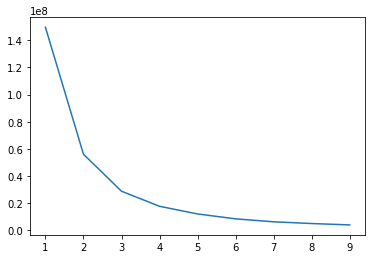

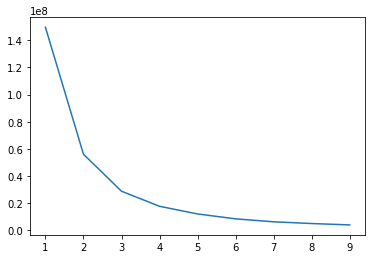

In [27]:
x_elbow = [i for i in range(1,10)]
y_elbow = l

plt.plot(x_elbow, y_elbow)

In [28]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
#.fit(x)
extra2 = kmeans.fit_transform(x)

In [29]:
extra1 = pd.DataFrame(extra1)
extra2 = pd.DataFrame(extra2)

In [30]:
extra1.columns

RangeIndex(start=0, stop=4, step=1)

RangeIndex(start=0, stop=4, step=1)

In [31]:
extra1.rename(columns = {0:'1_0', 1:'1_1', 2:'1_2', 3:'1_3'}, inplace= True)
extra2.rename(columns ={0:'2_0', 1:'2_1', 2:'2_2', 3:'2_3'}, inplace= True)

In [32]:
ds = pd.concat([ds.reset_index(), extra1, extra2], axis= 1)

# Extra Extra features

In [33]:
ds['urg'] = ds['description'].apply(lambda x: any([w in str(x).lower() for w in ['tecili', 'təcili', 'tacili', 'tcili', 'təcılı']]))
ds['rel_floor'] = ds['Mərtəbə'].apply(lambda x: int(x.split('/')[0])/int(x.split('/')[1]))

# Even More features

In [34]:
# x = ds[['price', 'area']]

In [35]:
# from sklearn.cluster import KMeans

# l = []

# for n in range(1, 10):
#     kmeans = KMeans(n_clusters = n, random_state = 42).fit(x)
#     l.append(kmeans.inertia_)

In [36]:
# x_elbow = [i for i in range(1,10)]
# y_elbow = l

# plt.plot(x_elbow, y_elbow)

In [37]:
#kmeans = KMeans(n_clusters = 3, random_state = 42).fit(x)

In [38]:
#ds['price_range'] = kmeans.labels_

# Predict Price Range

In [39]:
# x_temp = ds[['area', 'rooms', 'kmea']]
# y_temp = 

# could be added in the future

# TF-IDF

In [40]:
ds['description'] = ds['description'].fillna('nodescription', inplace=False)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
x_tfidf = tfidf.fit_transform(ds['description'])

# 3. Split dataset

In [42]:
temp=pd.DataFrame.sparse.from_spmatrix(x_tfidf)

In [43]:
ds.reset_index(inplace=True, drop=True)
ds = pd.concat([ds, temp], axis=1)

In [44]:
ds.shape

(67614, 3029)

(67614, 3029)

In [45]:
x_tfidf = ds.drop(columns=['title',     'price',        'price_currency',
                           'poster',   'Ünvan',     'description',  'Yeniləndi',        
                           'Mərtəbə',  'locations', 'latitude',     'longitude', 
                           'seher',    'urg',       'rel_floor',
                           '1_0', '1_1', '1_2', '1_3', '2_0', '2_1', '2_2', '2_3'], axis=1)

x = ds[['_id', 'area', 'rooms', 'Kupça', 'İpoteka', 'poster_type', 
        'rel_floor', 'urg', '1_0', '1_1', '1_2', '1_3', '2_0', '2_1', '2_2', '2_3']]
extra1.rename({0:'1_0', 1:'1_1', 2:'1_2', 3:'1_3'}, inplace= True)
extra1.rename({0:'2_0', 1:'2_1', 2:'2_2', 3:'2_3'}, inplace= True)
print(x.shape, x_tfidf.shape)
#x_tfidf= pd.DataFrame.sparse.from_spmatrix(x_tfidf)

(67614, 16) (67614, 3007)
(67614, 16) (67614, 3007)


In [46]:
#x = pd.concat([x, x_tfidf], axis=1)
x = pd.merge(x, x_tfidf, on='_id', how='left')
x = x.drop(columns= ['_id',       'poster_type_y',    'area_y',
                     'rooms_y',   'Kupça_y',          'İpoteka_y',
                     'index'], axis=1)

In [47]:
y = ds['price']

In [48]:
print(x.shape, y.shape)

(67614, 3015) (67614,)
(67614, 3015) (67614,)


In [49]:
from sklearn.model_selection import train_test_split
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, \
                                                   random_state = SEED)

# 5. Submission

In [50]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
y = ds['price']

In [52]:
x_train.columns[:30]

Index([       'area_x',       'rooms_x',       'Kupça_x',     'İpoteka_x',
       'poster_type_x',     'rel_floor',           'urg',           '1_0',
                 '1_1',           '1_2',           '1_3',           '2_0',
                 '2_1',           '2_2',           '2_3',               0,
                     1,               2,               3,               4,
                     5,               6,               7,               8,
                     9,              10,              11,              12,
                    13,              14],
      dtype='object')

Index([       'area_x',       'rooms_x',       'Kupça_x',     'İpoteka_x',
       'poster_type_x',     'rel_floor',           'urg',           '1_0',
                 '1_1',           '1_2',           '1_3',           '2_0',
                 '2_1',           '2_2',           '2_3',               0,
                     1,               2,               3,               4,
                     5,               6,               7,               8,
                     9,              10,              11,              12,
                    13,              14],
      dtype='object')

In [53]:
# from xgboost import XGBRegressor
# reg = XGBRegressor(n_estimators = 100)
# reg.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_test, y_test)],\
#         eval_metric = ["rmse"], verbose = True)

In [54]:
#try ensemble(--) / stacking(+) / increase number of kmeans classes (+)
#fight overfitting (++++)
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# y_pred = reg.predict(x_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mae = mean_absolute_error(y_test, y_pred)
# print(f'RMSE_xgb: {int(rmse)}     MAE_xgb: {int(mae)}')

In [55]:
#before submission

In [57]:
reg = XGBRegressor(n_estimators = 250)
reg.fit(x, y, eval_set = [(x_train, y_train), (x_test, y_test)],\
        eval_metric = ["rmse"], verbose = True)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:156425.36570	validation_1-rmse:153356.53796
[1]	validation_0-rmse:115483.99858	validation_1-rmse:113230.49404
[2]	validation_0-rmse:88149.28088	validation_1-rmse:86513.18553
[3]	validation_0-rmse:73044.00281	validation_1-rmse:71304.14165
[4]	validation_0-rmse:64619.76046	validation_1-rmse:62931.11779
[5]	validation_0-rmse:55956.08264	validation_1-rmse:54376.89421
[6]	validation_0-rmse:51555.35027	validation_1-rmse:50350.07631
[7]	validation_0-rmse:48148.74436	validation_1-rmse:47233.19026
[8]	validation_0-rmse:46964.93867	validation_1-rmse:46036.66278
[9]	validation_0-rmse:46274.44654	validation_1-rmse:45257.97920
[10]	validation_0-rmse:45939.92049	validation_1-rmse:44996.37885
[11]	validation_0-rmse:44697.02278	validation_1-rmse:43950.04786
[12]	validation_0-rmse:44362.78111	validation_1-rmse:43545.70230
[13]	validation_0-rmse:44224.60472	validation_1-rmse:43437.85238
[14]	validation_0-rmse:43630.97995	validation_1-rmse:42877.29922
[15]	validation_0-rmse:43235.16

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
test = pd.read_csv('binaaz_test.csv')
test.rename(columns = {'Sahə':'area', 'Otaq sayı':'rooms'}, inplace = True)
test['area'] = test['area'].apply(lambda x: float(x.rstrip('m²м')))
test['Kupça'] = test['Kupça'].apply(lambda s: 0 if s =='yoxdur' else 1)
test['İpoteka'] = test['İpoteka'].apply(lambda s: 0 if s =='yoxdur' else 1)
test['poster_type'] = test['poster_type'].apply(lambda s: 1 if s =='vasitəçi (agent)' else 0)

x_temp = test[['latitude', 'longitude']]

kmeans = KMeans(n_clusters = 4, random_state = 42).fit(ds[['latitude', 'longitude']])
extra1 = kmeans.transform(x_temp)


x_temp = test[['area', 'rooms']]

kmeans = KMeans(n_clusters = 4, random_state = 42).fit(ds[['area', 'rooms']])
extra2 = kmeans.transform(x_temp)


extra1 = pd.DataFrame(extra1, )
extra2 = pd.DataFrame(extra2, )


extra1.rename(columns ={0:'1_0', 1:'1_1', 2:'1_2', 3:'1_3'}, inplace= True)
extra2.rename(columns ={0:'2_0', 1:'2_1', 2:'2_2', 3:'2_3'}, inplace= True)

test = pd.concat([test, extra1, extra2], axis= 1)

test['urg'] = test['description'].apply(lambda x: any([w in str(x).lower() for w in ['tecili', 'təcili', 'tacili', 'tcili', 'təcılı']]))
test['rel_floor'] = test['Mərtəbə'].apply(lambda x: int(x.split('/')[0])/int(x.split('/')[1]))

test['description'].fillna('nodescription', inplace=True)
x_test_tfidf = tfidf.transform(test['description'])

test = test[['area', 'rooms', 'Kupça', 'İpoteka', 'poster_type', 'rel_floor', 
             'urg', '1_0', '1_1', '1_2', '1_3', '2_0', '2_1', '2_2', '2_3']]

In [ ]:
x.columns[:30]

In [ ]:
test.columns[:30]

In [ ]:
temp2=pd.DataFrame.sparse.from_spmatrix(x_test_tfidf)

In [ ]:
test = pd.concat([test, temp2], axis=1)

In [ ]:
test2 = pd.read_csv('binaaz_test.csv')
test2 = test2['_id']

In [ ]:
y_pred = reg.predict(test)
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_try = pd.concat([y_pred, test2], axis=1) 

In [ ]:
y_try

In [ ]:
out_dict = {'_id': y_try['_id'],
            'price': y_try[0]
           }
out = pd.DataFrame(out_dict)

In [ ]:
out.to_csv('submissionmax2try.csv', index=False)

In [ ]:
#add stacking
#add distances to labels
#make bigger train set, removed from cleaning

In [ ]:
# x_test.iloc[:, 0]

In [ ]:
# x_test.iloc[:, 0] = x_test.iloc[:, 0].apply(lambda x: float(x.rstrip('m²м')))

In [ ]:
# x_test

In [ ]:
# from xgboost import XGBRegressor
# from sklearn.ensemble import RandomForestRegressor
# reg = XGBRegressor()
'''
from sklearn.model_selection import GridSearchCV
params = {
          'n_estimators': [110],
          'max_depth': [10],
         }
#'criterion': ['gini', 'entropy', 'log_loss']
#'max_features': ['sqrt', 'log2', None]
search = GridSearchCV(reg, param_grid=params, verbose=100)
search.fit(x_train, y_train)
search.best_params_
reg = RandomForestRegressor(n_estimators=110, max_depth=10)
reg.fit(x_train, y_train)
'''

In [ ]:
# reg.fit(x_train, y_train)

In [ ]:
# x_test.columns[:10]

In [ ]:
# import os
# filepath = os.getcwd()
# print(filepath)

In [ ]:
# out.to_csv('submission_all.csv', index=False)